In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [43]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_clean.csv")

In [44]:
pd.set_option("display.max_colwidth",None,"display.max_columns",None)

In [45]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Normlisasi dan Standarisasi

mari cek apakah kolom numerikal itu distribusi normal atau tidak

In [46]:
Numerikal = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

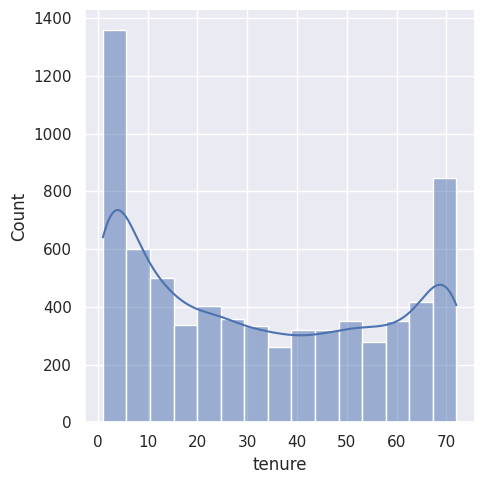

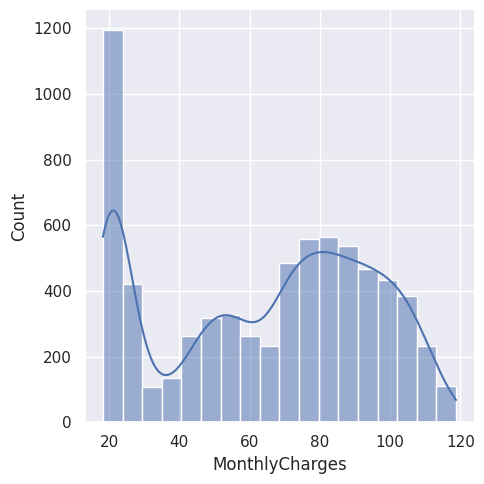

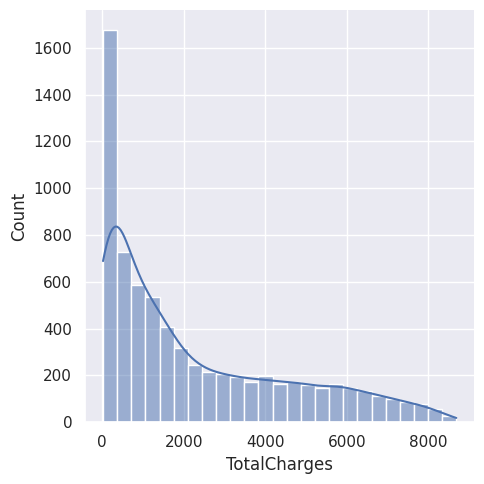

In [47]:
for i in Numerikal.columns:
  sns.displot(df, x=i, kde=True, height=5)
  plt.show()

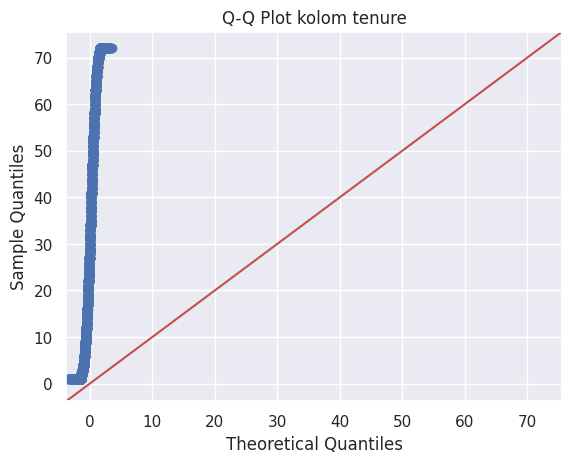

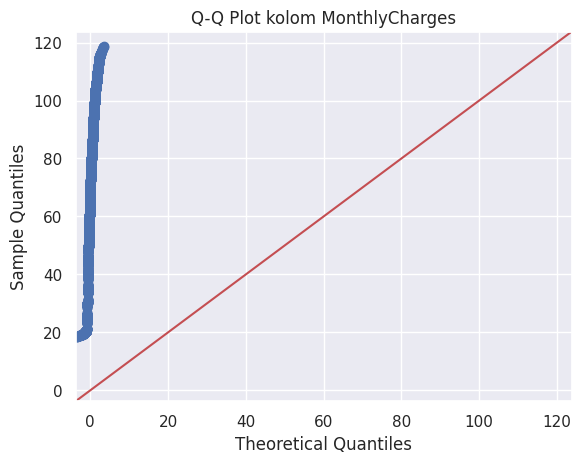

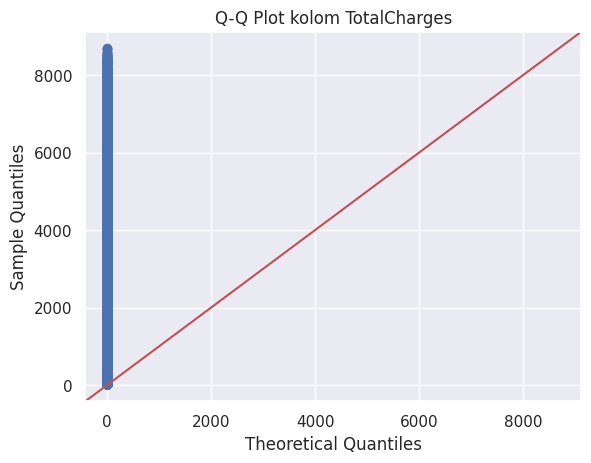

In [48]:
for i in Numerikal.columns:
  sm.qqplot(df[i], line ='45')
  plt.title(f"Q-Q Plot kolom {i}")
  plt.show()

Karena bukan distribusi normal, maka kita akan lakukan Normalisasi

kita akan menggunakan Z-Score Normalization karena ini cocok untuk data yang distribusinya tidak diketahui

In [49]:
Numerikal.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [50]:
scaler = StandardScaler()
df["tenure"] = pd.DataFrame(scaler.fit_transform(df[["tenure"]]), columns=["tenure"])

In [51]:
df["MonthlyCharges"] = pd.DataFrame(scaler.fit_transform(df[["MonthlyCharges"]]), columns=["MonthlyCharges"])

In [52]:
df["TotalCharges"] = pd.DataFrame(scaler.fit_transform(df[["TotalCharges"]]), columns=["TotalCharges"])

### Feature encoding

In [53]:
Kategorikal = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [54]:
df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [56]:
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [57]:
df

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,No,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,No,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,Yes,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0.512486,-0.747850,-0.195248,No,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,-1.239504,0.196178,-0.940457,Yes,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,-0.343137,0.664868,-0.129180,No,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7028,2234-XADUH,1.612573,1.276493,2.241056,No,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7029,4801-JZAZL,-0.872808,-1.170004,-0.854514,No,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7030,8361-LTMKD,-1.158016,0.319168,-0.872095,Yes,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   tenure                                   7032 non-null   float64
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   object 
 5   gender_Female                            7032 non-null   int64  
 6   gender_Male                              7032 non-null   int64  
 7   SeniorCitizen_0                          7032 non-null   int64  
 8   SeniorCitizen_1                          7032 non-null   int64  
 9   Partner_No                               7032 non-null   int64  
 10  Partner_Yes                              7032 no

### Export dataset

In [59]:
import os
df.to_csv("TelcoChurn_prep.csv", index=False)
print(os.listdir('.'))

['.config', 'drive', 'TelcoChurn_prep.csv', 'sample_data']
